In [504]:
%matplotlib inline

In [505]:
if True: 
    import matplotlib.pylab as plt
    import numpy as np
    


In [506]:
def openfile(fname):
    f =  open(fname, 'r')

    line = f.next()
    a = (line.strip().split(" "))
    a = [b for b in a if b]

    Nx = int(a[0])
    Ny = int(a[1])
    Nz = int(a[2])

    Sx = float(a[3])
    Sy = float(a[4])
    Sz = float(a[5])

    Ox = float(a[6])
    Oy = float(a[7])
    Oz = float(a[8])

    line = f.next()
    a = (line.strip().split(" "))
    a = [b for b in a if b]
    nvar = int(a[0])

    line = f.next()
    a = (line.strip().split(" "))
    a = [b for b in a if b]
    name_of_variable_1 = (a[0])
    print name_of_variable_1,
    
    facies = np.zeros([Nx, Ny])
    for i in range(Ny):
        for j in range(Nx):
            facies[i, j] = int(f.next().split()[0])
            
    return facies, Nx, Ny

In [507]:
facies, nx,ny = openfile("ti.gslib")

facies


In [508]:
test_real00000 ,  nx, ny = openfile("output/test_real00000.gslib")

facies_real00000


In [509]:
nx =  50
ny = nx

facies = facies[:nx, :ny]
test_real00000 = test_real00000[:nx, :ny]

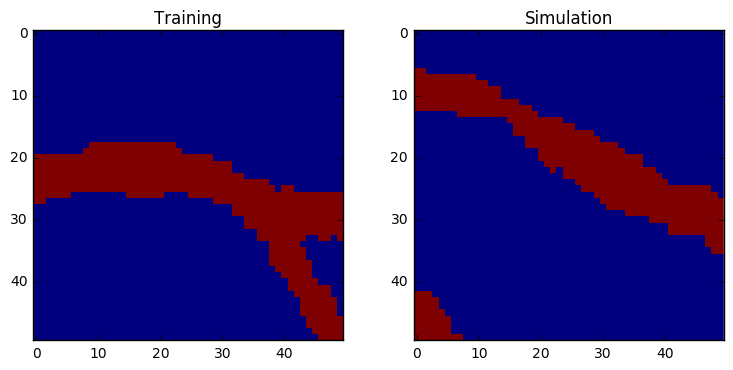

In [511]:
fig = plt.figure(figsize = (9,4))
ax = fig.add_subplot(121)
plt.imshow(facies, interpolation='none')
plt.title('Training')
ax = fig.add_subplot(122)
plt.imshow(test_real00000, interpolation='none')
plt.title('Simulation')

In [512]:
import pysal
import numpy as np
np.random.seed(12345)
import time

from pysal.esda.getisord import G
from pysal import Moran

In [515]:
# weight options:
# w = pysal.threshold_binaryW_from_array(data, 2)
# w = pysal.threshold_continuousW_from_array(data, 3, alpha = -1)
# w = pysal.Kernel(data, fixed = False, function = 'gaussian')

In [514]:
x,y=np.indices((nx,ny))
x.shape=(nx**2,1)
y.shape=(ny**2,1)
data=np.hstack([x,y])

start_time = time.time()
w = pysal.weights.Distance.DistanceBand(data, 1, binary = 'True')
print time.time() - start_time


0.0383059978485


In [502]:
start_time = time.time()
g = G(facies, w)
# print "Time elapsed {0:.2f}s".format(time.time() - start_time)
print "Getis and Ord’s G : {0:.4f}, (z_sim={1:.4f}, p_z_sim={2:.4f}) ".format( g.G,
            g.z_sim, g.p_sim)

Gi = g.G

Getis and Ord’s G : 0.0075, (z_sim=64.7610, p_z_sim=0.0010) 


In [503]:
start_time = time.time()
I = Moran(facies, w)
# print "Time elapsed {0:.2f}s".format(time.time() - start_time)
print "Moran's I: {0:.4f}, (z_sim={1:.4f}, p_z_sim={2:.4f}) ".format( I.I,
            I.z_sim, I.p_sim)

Ii = I.I

Moran's I: 0.8915, (z_sim=61.4341, p_z_sim=0.0010) 


In [461]:
import os
path = '.'
files = [i for i in os.listdir(path) if os.path.isfile(os.path.join(path,i)) and \
         'test_real' in i]

In [462]:
testfiles = []
for testfile in files:
    test,  _, _ = openfile(testfile)
    testfiles.append(test[:nx, :ny])

facies_real00000 facies_real00001 facies_real00002 facies_real00003 facies_real00004 facies_real00005 facies_real00006 facies_real00007 facies_real00008 facies_real00009 facies_real00010 facies_real00011 facies_real00012 facies_real00013 facies_real00014 facies_real00015 facies_real00016 facies_real00017 facies_real00018 facies_real00019 facies_real00020 facies_real00021 facies_real00022 facies_real00023 facies_real00024 facies_real00025 facies_real00026 facies_real00027 facies_real00028 facies_real00029 facies_real00030 facies_real00031 facies_real00032 facies_real00033 facies_real00034 facies_real00035 facies_real00036 facies_real00037 facies_real00038 facies_real00039 facies_real00040 facies_real00041 facies_real00042 facies_real00043 facies_real00044 facies_real00045 facies_real00046 facies_real00047 facies_real00048 facies_real00049 facies_real00050 facies_real00051 facies_real00052 facies_real00053 facies_real00054 facies_real00055 facies_real00056 facies_real00057 facies_real000

In [463]:

start_time = time.time()
Gs = []
count = []
for testfile in testfiles:   
    g = G(testfile[:nx, :ny], w)
#     print "Getis and Ord’s G : {0:.4f}, (z_sim={1:.4f}, p_z_sim={2:.4f}) ".format( g.G,
#                 g.z_sim, g.p_sim)
    Gs.append(g.G)
    
    count.append(np.sum(testfile[:nx, :ny]))
print "Time elapsed {0:.2f}s".format(time.time() - start_time)

Time elapsed 16.64s


In [464]:
start_time = time.time()
Is = []
count = []
for testfile in testfiles:   
    
    I = Moran(testfile[:nx, :ny], w)
#     print "Moran's I: {0:.4f}, (z_sim={1:.4f}, p_z_sim={2:.4f}) ".format( I.I,
#                 I.z_sim, I.p_sim)
    Is.append(I.I)
    
    count.append(np.sum(testfile[:nx, :ny]))
print "Time elapsed {0:.2f}s".format(time.time() - start_time)

Time elapsed 14.02s


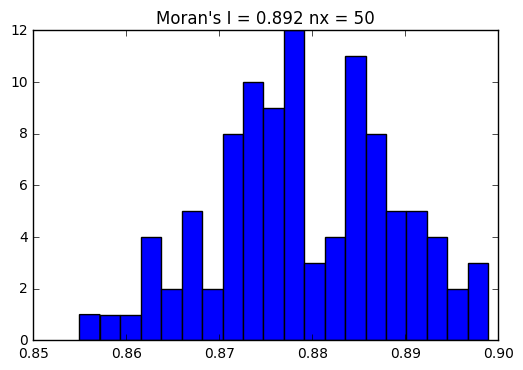

In [471]:
fig = plt.figure()
plt.hist(Is, 20)
plt.title('Moran\'s I = {0:.3} nx = {1}'.format(Ii, nx))
printstr = 'I nx={1}; n={0}.pdf'.format(len(Is), nx)
fig.savefig('conserved/{0}'.format(printstr))

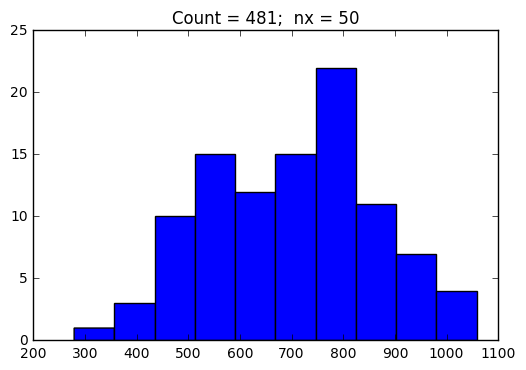

In [476]:
fig = plt.figure()
plt.hist(count, 10)
plt.title('Count = {0:.0f};  nx = {1}'.format(np.sum(facies), nx))
printstr = 'count nx={1}; n={0}.pdf'.format(len(count), nx)
fig.savefig('conserved/{0}'.format(printstr))

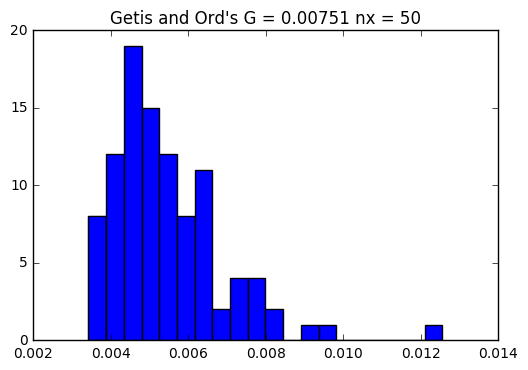

In [475]:
fig = plt.figure()
plt.hist(Gs, 20)
plt.title('Getis and Ord\'s G = {0:.3} nx = {1}'.format(Gi, nx))
printstr = 'G nx={1}; n={0}.pdf'.format(len(Gs), nx)
fig.savefig('conserved/{0}'.format(printstr))

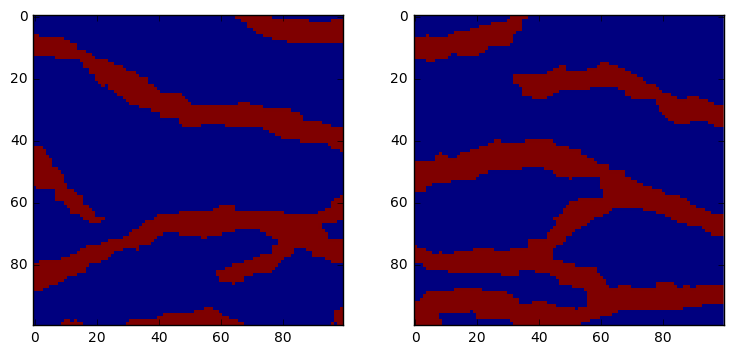

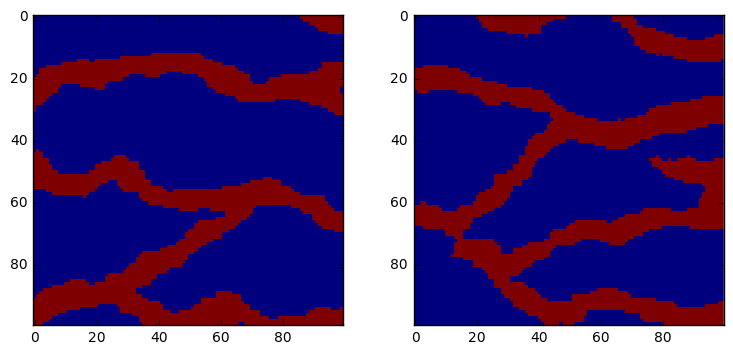

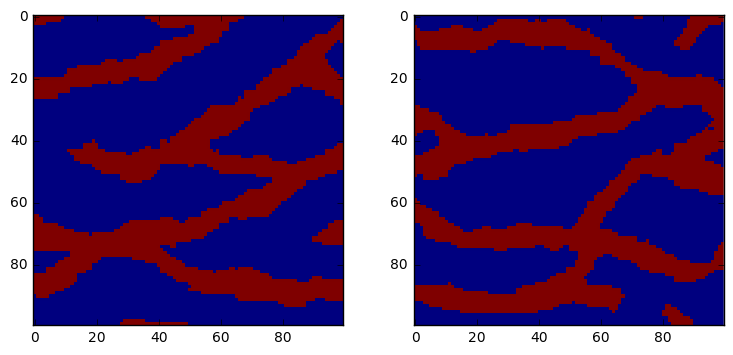

In [435]:
for i, testfile in enumerate(testfiles[:6]):
    if np.mod(i, 2) == 0:
        fig = plt.figure(figsize = (9,4))
        ax = fig.add_subplot(121)
        plt.imshow(testfile, interpolation='none')
    elif np.mod(i, 2) == 1:
        ax = fig.add_subplot(122)
        plt.imshow(testfile, interpolation='none')